In [1]:
from autometrics.dataset.datasets import Primock57
from autometrics.util.analysis import display_top_5_metrics_by_validation_precomputed, display_top_5_metrics_by_validation, get_top_metric_by_validation, get_top_metric_by_validation_precomputed, plot_metric_target_scatterplot
from autometrics.evaluate.correlation import calculate_correlation
from autometrics.aggregator.regression.PLS import PLS
from autometrics.aggregator.regression import Ridge, ElasticNet, Lasso, RandomForest, GradientBoosting, Linear
from autometrics.aggregator.regression.BudgetRegression import BudgetRegression

In [2]:
dataset = Primock57(path='./autometrics/dataset/datasets/primock57/metric-scores.csv')

In [3]:
calculate_correlation(dataset)

{'time_sec': {'human_note | ROUGE-1-F1*': np.float64(-0.2210666653540734),
  'human_note | ROUGE-2-F1*': np.float64(-0.2438561070499559),
  'human_note | ROUGE-3-F1*': np.float64(-0.2304967336644645),
  'human_note | ROUGE-4-F1*': np.float64(-0.2147377902945769),
  'human_note | ROUGE-L-Pr*': np.float64(-0.21559914070728997),
  'human_note | ROUGE-L-Re*': np.float64(-0.2667973914168294),
  'human_note | ROUGE-L-F1*': np.float64(-0.24372441111590204),
  'human_note | CHRF*': np.float64(-0.22112983608173942),
  'human_note | METEOR*': np.float64(-0.27302879924172485),
  'human_note | BLEU*': np.float64(-0.23480766931196095),
  'human_note | Levenshtein dist.': np.float64(-0.3399838906893468),
  'human_note | WER': np.float64(-0.14613320973746502),
  'human_note | MER': np.float64(-0.2517157405070455),
  'human_note | WIL': np.float64(-0.2548656737983419),
  'human_note | ROUGE-WE*': np.float64(-0.2613073502029944),
  'human_note | SkipThoughts*': np.float64(-0.1960303692056642),
  'human

In [4]:
splits, train_overall, test = dataset.get_kfold_splits()

In [5]:
display_top_5_metrics_by_validation(train_overall, test)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,edited_note | Levenshtein dist. (-0.7662180842...,edited_note | BertScore* (-0.6815637647712762),edited_note | METEOR* (-0.6453847921829924),max | Levenshtein dist. (-0.6230756160217463),edited_note | ROUGE-2-F1* (-0.6517368513787543)
incorrect,edited_note | ROUGE-L-Pr* (-0.783473823360692),max | ROUGE-L-Pr* (-0.7549390494864066),avg | ROUGE-L-Pr* (-0.6001387443479093),avg | Levenshtein dist. (-0.461167201624087),avg | ROUGE-4-F1* (-0.5910352168596185)
omissions,edited_note | Levenshtein dist. (-0.8073103234...,edited_note | METEOR* (-0.807558165317811),edited_note | BLEU* (-0.7924049810134982),edited_note | BertScore* (-0.7979951434208621),edited_note | ROUGE-L-Re* (-0.7908526187745726)
inc_plus_omi,edited_note | Levenshtein dist. (-0.8235071177...,edited_note | BertScore* (-0.818001452694192),edited_note | ROUGE-2-F1* (-0.7899362818150207),edited_note | ROUGE-3-F1* (-0.7870003348312238),edited_note | WIL (-0.7882515377137709)


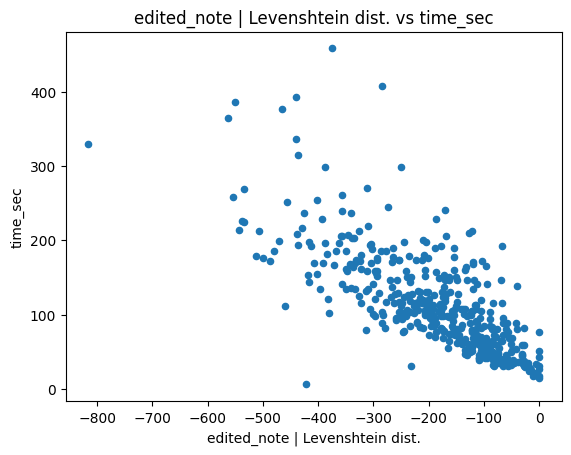

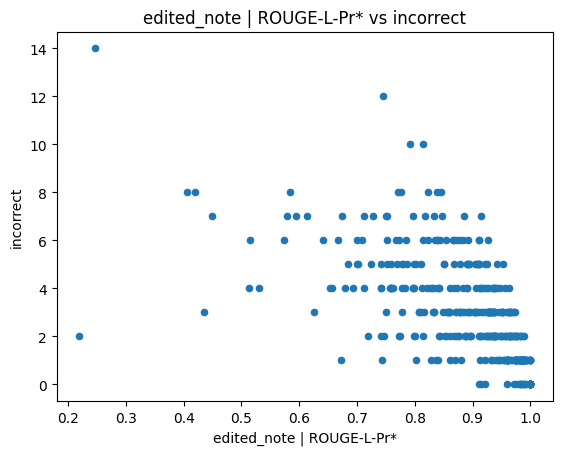

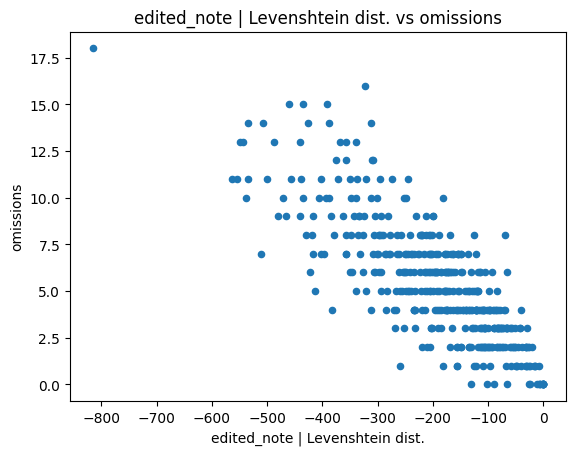

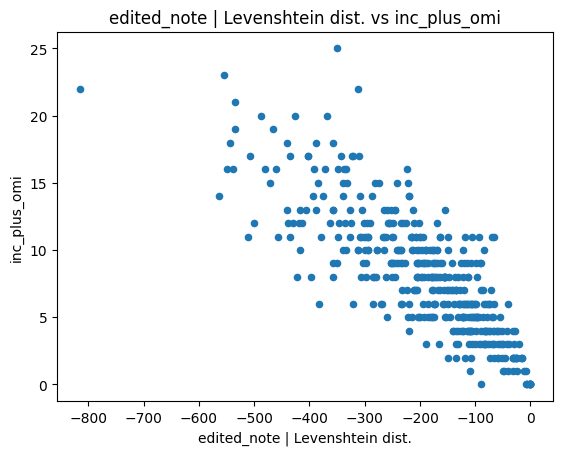

In [6]:
for target_column in dataset.get_target_columns():
    metric = get_top_metric_by_validation(train_overall, target_column, compute_all=False)
    plot_metric_target_scatterplot(test, metric, target_column)

In [7]:
sum_correlations = {}

for split in splits:
    train, val = split
    for target in dataset.get_target_columns():
        aggregator = Ridge(dataset=train, name=f'Ridge_{target}')
        aggregator.learn(train, target)
        aggregator.predict(val, target)

    corr = calculate_correlation(val, compute_all=True)

    for target in dataset.get_target_columns():
        if target not in sum_correlations:
            sum_correlations[target] = {}
        for metric in corr[target]:
            if metric not in sum_correlations[target]:
                sum_correlations[target][metric] = 0
            sum_correlations[target][metric] += corr[target][metric]

for target in sum_correlations:
    for metric in sum_correlations[target]:
        sum_correlations[target][metric] /= len(splits)

In [8]:
test_corr = {}

for target in dataset.get_target_columns():
    aggregator = Ridge(dataset=train_overall, name=f'Ridge_{target}')
    aggregator.learn(train_overall, target)
    aggregator.predict(test, target)

    test_corr = calculate_correlation(test, compute_all=True)

In [9]:
display_top_5_metrics_by_validation_precomputed(sum_correlations, sum_correlations)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,Rg_time_sec (0.8380941303114449),Rg_inc_plus_omi (0.7894917557141651),edited_note | Levenshtein dist. (-0.7841370381...,Rg_omissions (0.7806676581953047),edited_note | BertScore* (-0.6900099531127163)
incorrect,Rg_incorrect (0.8105155127672585),edited_note | ROUGE-L-Pr* (-0.7689702587201923),max | ROUGE-L-Pr* (-0.7369527044279555),Rg_inc_plus_omi (0.6734363849449068),avg | ROUGE-L-Pr* (-0.6275948541681231)
omissions,Rg_omissions (0.8670702827647409),edited_note | Levenshtein dist. (-0.8330060487...,edited_note | METEOR* (-0.819577839268236),Rg_time_sec (0.8030674391901813),edited_note | BLEU* (-0.7969096209639139)
inc_plus_omi,Rg_inc_plus_omi (0.8834476515484132),edited_note | Levenshtein dist. (-0.8351840410...,Rg_omissions (0.8268705003158386),Rg_time_sec (0.8267604232349184),edited_note | BertScore* (-0.8065469701839719)


In [10]:
display_top_5_metrics_by_validation_precomputed(sum_correlations, test_corr)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,Rg_time_sec (0.8240059633862106),Rg_inc_plus_omi (0.784165300377419),edited_note | Levenshtein dist. (-0.7662180842...,Rg_omissions (0.7877151551016698),edited_note | BertScore* (-0.6815637647712762)
incorrect,Rg_incorrect (0.814325116514615),edited_note | ROUGE-L-Pr* (-0.783473823360692),max | ROUGE-L-Pr* (-0.7549390494864066),Rg_inc_plus_omi (0.6761262131333273),avg | ROUGE-L-Pr* (-0.6001387443479093)
omissions,Rg_omissions (0.874482972642545),edited_note | Levenshtein dist. (-0.8073103234...,edited_note | METEOR* (-0.807558165317811),Rg_time_sec (0.7667610902599591),edited_note | BLEU* (-0.7924049810134982)
inc_plus_omi,Rg_inc_plus_omi (0.8963531138943527),edited_note | Levenshtein dist. (-0.8235071177...,Rg_omissions (0.8480976686117002),Rg_time_sec (0.8026722702040608),edited_note | BertScore* (-0.818001452694192)


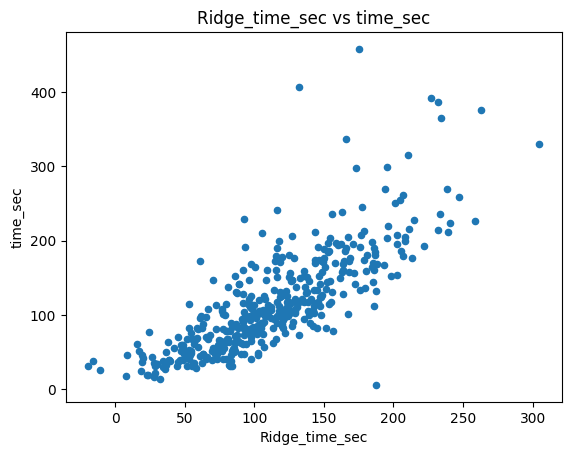

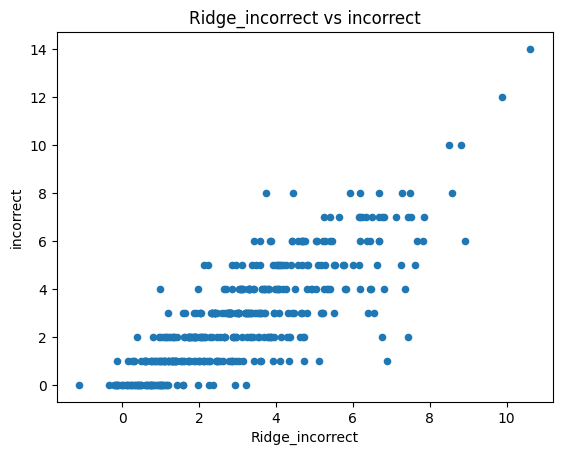

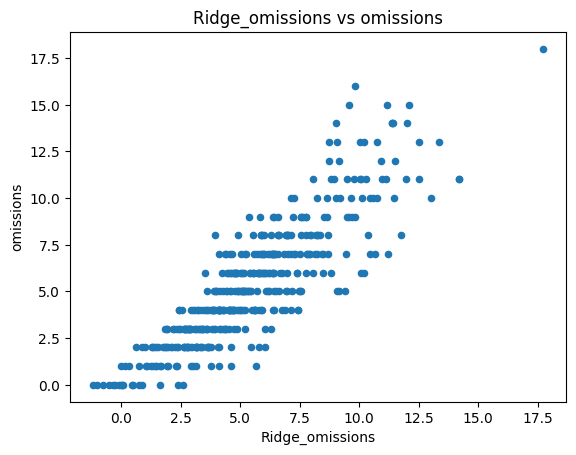

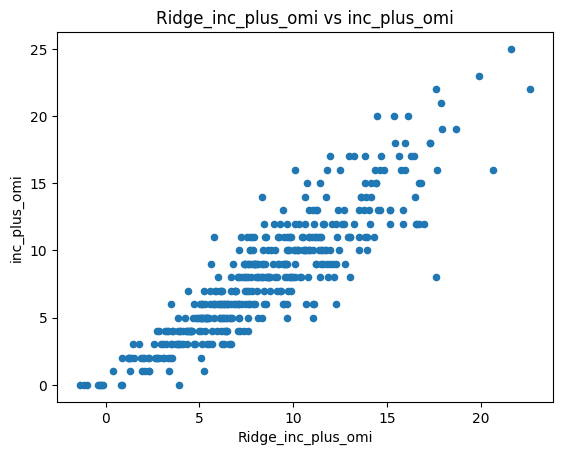

In [11]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation_precomputed(sum_correlations, target_column)
    plot_metric_target_scatterplot(test, metric, target_column)


In [12]:
# Budget Runs
for model in [Ridge]:
    for budget in [2, 3, 5, 10, 15, 20, 25]:
        for target_column in dataset.target_columns:
            model_instance = model(dataset=train, name=model.__name__ + '_' + target_column)
            budget_model = BudgetRegression(model_instance, budget)
            budget_model.learn(train, target_column)
            budget_model.predict(train, target_column)
            budget_model.predict(dev, target_column)
            budget_model.predict(test, target_column)

NameError: name 'dev' is not defined

In [9]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,Rg_time_sec (0.8223374670016869),RandomForest_time_sec_bgt_3Top 3 (0.7398647677...,GB_time_sec_bgt_3Top 3 (0.7682132859133527),Rg_omissions (0.74854385188165),Rg_inc_plus_omi (0.7758587318384566)
incorrect,Rg_incorrect (0.7816079186424769),Rg_incorrect_bgt_2Top 2 (0.7906062745106216),edited_note | ROUGE-L-Pr* (-0.7769928679302135),PLS_incorrect (0.7793636361349978),RandomForest_incorrect_bgt_15Top 15 (0.7799701...
omissions,Rg_omissions (0.842425821453117),GB_omissions_bgt_5Top 5 (0.8276918150075941),RandomForest_omissions_bgt_20Top 20 (0.8327214...,RandomForest_omissions_bgt_10Top 10 (0.8410943...,RandomForest_omissions_bgt_15Top 15 (0.8343911...
inc_plus_omi,Rg_inc_plus_omi (0.8553512554357171),RandomForest_ipo_bgt_20Top 20 (0.8531082568500...,RandomForest_inc_plus_omi (0.8504668188027519),RandomForest_ipo_bgt_25Top 25 (0.8521762781567...,GB_inc_plus_omi (0.8483119744553024)


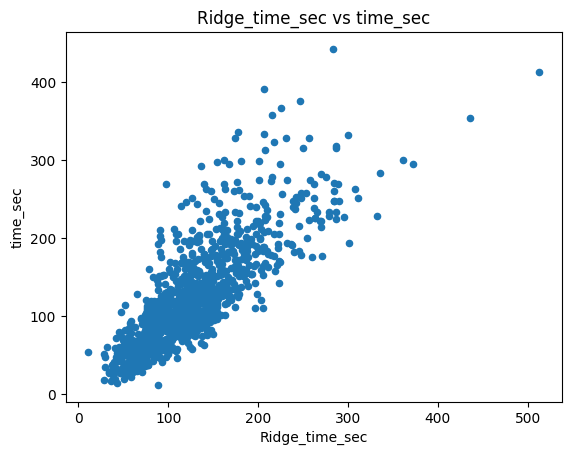

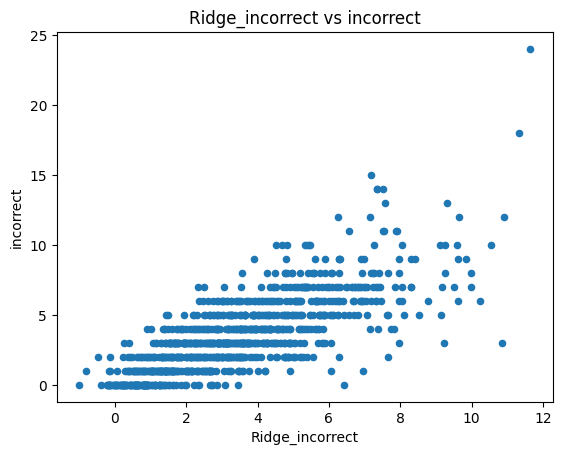

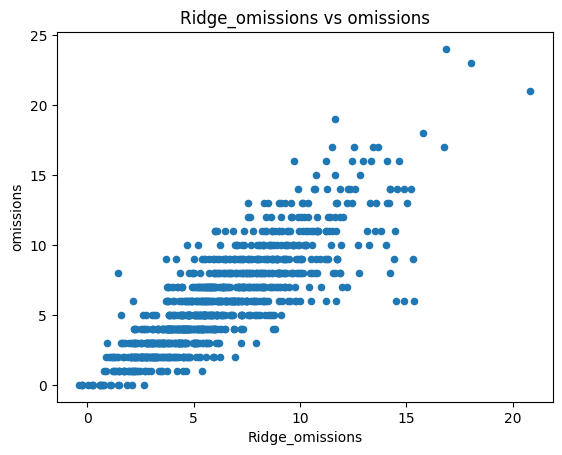

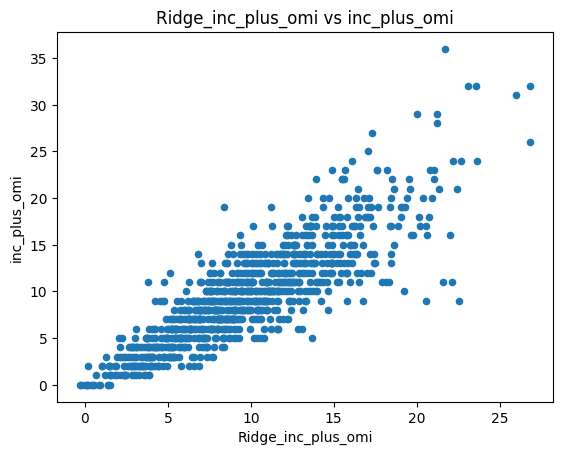

In [10]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, test, True, target_column)
    plot_metric_target_scatterplot(test, metric, target_column)